In [3]:

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:

y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [7]:

y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Plotting some images

In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

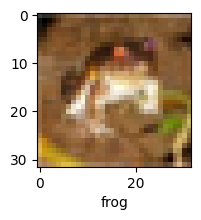

In [11]:
plot_sample(X_train, y_train, 0)

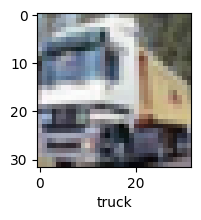

In [12]:
plot_sample(X_train, y_train, 1)


Normalizing the training data

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0


Build simple artificial neural network for image classification

In [ ]:

ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 117s 74ms/step - accuracy: 0.3038 - loss: 1.9361
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 75ms/step - accuracy: 0.4211 - loss: 1.6506
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 77ms/step - accuracy: 0.4510 - loss: 1.5535
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 76ms/step - accuracy: 0.4763 - loss: 1.4879
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 74ms/step - accuracy: 0.4937 - loss: 1.4367


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.41      0.51      1000
           1       0.62      0.60      0.61      1000
           2       0.48      0.19      0.28      1000
           3       0.37      0.32      0.34      1000
           4       0.40      0.48      0.43      1000
           5       0.45      0.32      0.37      1000
           6       0.45      0.64      0.53      1000
           7       0.45      0.65      0.53      1000
           8       0.59      0.65      0.62      1000
           9       0.50      0.63      0.56      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.48     10000
weighted avg       0.50      0.49      0.48     10000



 Building a convolutional neural network to train the images

In [14]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 39ms/step - accuracy: 0.3692 - loss: 1.7150
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.5832 - loss: 1.1825
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 37ms/step - accuracy: 0.6477 - loss: 1.0101
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 38ms/step - accuracy: 0.6736 - loss: 0.9358
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 39ms/step - accuracy: 0.7016 - loss: 0.8623
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.7202 - loss: 0.8136
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.7352 - loss: 0.7645
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.7501 - loss: 0.7188
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 39ms/step - accuracy: 0.7631 - loss: 0.6817
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.7746 - loss: 0.6501


In [17]:

cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6850 - loss: 0.9329


[0.9372658133506775, 0.6866999864578247]

In [18]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step


array([[1.8019178e-04, 5.3554389e-04, 5.5725449e-03, 5.9812450e-01,
        8.0781886e-03, 3.7151927e-01, 1.3484195e-02, 1.4847242e-04,
        2.1248583e-03, 2.3221923e-04],
       [1.0279359e-02, 1.0526982e-01, 3.2556208e-04, 5.1949090e-05,
        1.5501037e-05, 2.2624286e-06, 5.5252654e-05, 4.1628427e-06,
        8.8226914e-01, 1.7269871e-03],
       [2.8517121e-02, 2.2741751e-01, 9.9085178e-04, 3.0628633e-02,
        4.8911683e-03, 1.0416541e-02, 3.1827544e-03, 3.4389242e-03,
        6.0698336e-01, 8.3533041e-02],
       [9.3423635e-01, 2.9741218e-03, 3.8493061e-03, 4.1173014e-04,
        4.6252790e-03, 2.0159422e-04, 1.4819381e-03, 3.3021602e-04,
        5.1344622e-02, 5.4485491e-04],
       [3.6933789e-06, 1.3470265e-06, 2.6804460e-02, 3.3586606e-02,
        5.7912189e-01, 1.0966219e-03, 3.5937601e-01, 1.8266192e-06,
        6.9995704e-06, 5.7945050e-07]], dtype=float32)

In [19]:

y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [20]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

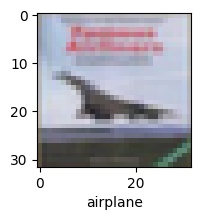

In [21]:
plot_sample(X_test, y_test,3)

In [22]:

classes[y_classes[3]]

'airplane'

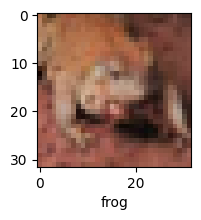

In [23]:
plot_sample(X_test, y_test,5)

In [25]:

classes[y_classes[5]]

'frog'

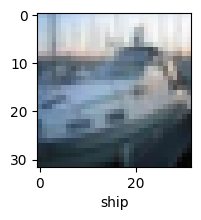

In [26]:
plot_sample(X_test, y_test,2)

In [27]:

classes[y_classes[2]]

'ship'